In [6]:
import matplotlib.pyplot as plt
from PDnode import Node
from Spatialnet import SpatialNetwork
from recreated import TestBench


def time_ratio_graph(n, k, graph_type, c0, N, p=None, M=10, T=1, R=0.25, P=0, S=0):
    Node.change_rule(T, R, P, S)
    bench = TestBench(n, k, graph_type, c0, p, N, M)
    bench.iterate()
    bench.draw()


def T_ratio_graph(n, k, graph_type, c0, N=100, p=None, M=10, T_min = 1, T_max = 2.5, T_steps = 16, R=1, P=0, S=0):
    ratios = []
    T_values = []
    for T in np.linspace(T_min, T_max, T_steps):
        Node.change_rule(T, R, P, S)
        bench = TestBench(n, k, graph_type, c0, p, N, M)
        bench.iterate()
        ratios.append((bench.ratio[len(bench.ratio) - 1] * 100))
        T_values.append(T)
    plt.plot(T_values,ratios)
    plt.xlabel('T')
    plt.ylabel('% C')
    plt.ylim(0,100)
    plt.show()


def time_ratio_rewire_graph(n, k, graph_type, c0, N, M=10, T=1, R=0.25, P=0, S=0, title = None):
    Node.change_rule(T, R, P, S)
    if graph_type == 'WS':
        gt = 'regular'
    elif graph_type == 'rewired_lattice':
        gt = 'lattice'
    else:
        gt = graph_type
    bench = TestBench(n=n, k=k, graph_type=gt, c0=c0, N=N, M=M)
    bench.iterate()
    bench.draw2("p=0")
    ps = [0.001, 0.01, 0.1, 0.8]
    for p in ps:
        bench = TestBench(n, k, graph_type, c0, p, N, M)
        bench.iterate()
        bench.draw2("p="+str(p))
    plt.legend()
    plt.ylim(0,100)
    #if title is not None:
    #    plt.savefig(title)
    plt.show()

Fig 2.(a), (b), (c)

In [11]:
n = 3600
k = 8
M = 10
gt = 'WS'

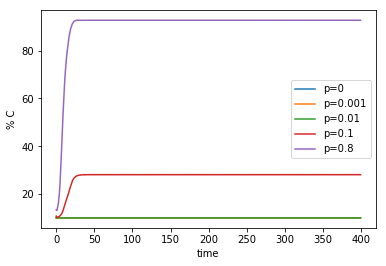

In [12]:
time_ratio_rewire_graph(n=n, k=k, graph_type=gt, c0=0.1, N=400, M=M, T=1.1, R=1, P=0, S=0, title='fig2_a.png')

In [ ]:
time_ratio_rewire_graph(n=n, k=k, graph_type=gt, c0=0.5, N=800, M=M, T=1.7, R=1, P=0, S=0, title='fig2_b.png')

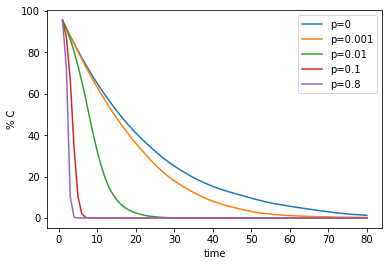

In [18]:
time_ratio_rewire_graph(n=n, k=k, graph_type=gt, c0=0.995, N=80, M=M, T=3, R=1, P=0, S=0, title='fig2_c.png')

Fig 2.(d), (e), (f)

In [ ]:
time_ratio_rewire_graph(n=3600, k=8, graph_type='rewired_lattice', c0=0.1, N=100, M=10, T=1.1, R=1, P=0, S=0, title='fig2_d.png')

In [ ]:
time_ratio_rewire_graph(n=3600, k=8, graph_type='rewired_lattice', c0=0.5, N=60, M=15, T=1.7, R=1, P=0, S=0, title='fig2_e.png')

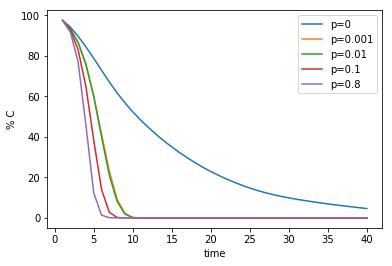

In [22]:
time_ratio_rewire_graph(n=3600, k=8, graph_type='rewired_lattice', c0=0.995, N=40, M=10, T=3, R=1, P=0, S=0, title='fig2_f.png')